In [0]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import loadtxt

from matplotlib.colors import LogNorm
from sklearn import mixture
import scipy.stats as stats

Question 3

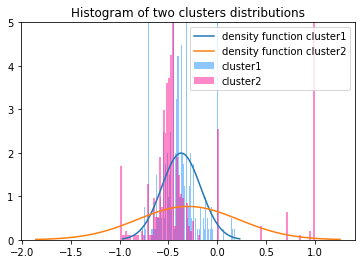

In [78]:
amerge = loadtxt("/content/Amerge.txt", delimiter=" ")

gmm_amerge = mixture.GaussianMixture(n_components=2).fit(amerge)
labels = gmm_amerge.predict(amerge)

kwargs = dict(alpha=0.5, linewidth=2,bins=100)
# histograms
plt.hist(amerge[:,0][labels == 0], density = True, **kwargs, color='dodgerblue', label = 'cluster1')
plt.hist(amerge[:,0][labels == 1], density = True, **kwargs, color='deeppink', label = 'cluster2')

# specifications
plt.gca().set(title='Histogram of two clusters distributions')
plt.gca().axes.set_ylim([0,5])


mu = np.round(gmm_amerge.means_,2)[0,0]
variance = np.round(gmm_amerge.covariances_,2)[0][0,0]
sigma = variance**(1/2)
x_density = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x_density, stats.norm.pdf(x_density, mu, sigma),label = 'density function cluster1')

mu = np.round(gmm_amerge.means_,2)[1,0]
variance = np.round(gmm_amerge.covariances_,2)[1][0,0]
sigma = variance**(1/2)
x_density = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x_density, stats.norm.pdf(x_density, mu, sigma),label = 'density function cluster2')
plt.legend()

plt.show()

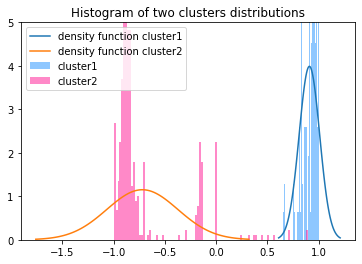

In [79]:
kwargs = dict(alpha=0.5, linewidth=2,bins=100)
# histograms
plt.hist(amerge[:,1][labels == 0], density = True, **kwargs, color='dodgerblue', label = 'cluster1')
plt.hist(amerge[:,1][labels == 1], density = True, **kwargs, color='deeppink', label = 'cluster2')

# specifications
plt.gca().set(title='Histogram of two clusters distributions')
plt.gca().axes.set_ylim([0,5])


mu = np.round(gmm_amerge.means_,2)[0,1]
variance = np.round(gmm_amerge.covariances_,2)[0][1,1]
sigma = variance**(1/2)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma),label = 'density function cluster1')

mu = np.round(gmm_amerge.means_,2)[1,1]
variance = np.round(gmm_amerge.covariances_,2)[1][1,1]
sigma = variance**(1/2)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma),label = 'density function cluster2')
plt.legend()

plt.show()

Question 5

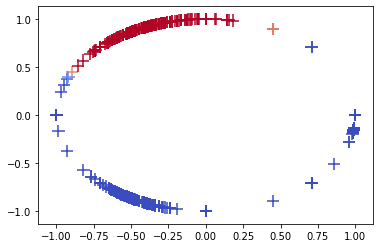

In [80]:
from scipy.stats import multivariate_normal
mean =np.round(gmm_amerge.means_,2)
variance =np.round(gmm_amerge.covariances_,2)
weights=np.round(gmm_amerge.weights_,2)
p_z=weights[0]*multivariate_normal.pdf(amerge, mean[0], variance[0])/(weights[0]*multivariate_normal.pdf(amerge, mean[0], variance[0])+weights[1]*multivariate_normal.pdf(amerge, mean[1], variance[1]))

plt.scatter(amerge[:,0], amerge[:,1], marker='+', s=150, linewidths=4, c=p_z, cmap=plt.cm.coolwarm)
plt.show()